In [48]:
import requests
import json
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import asyncio 

# Question: Research Question: Which data science tool is more popular in the data science/statistics community pandas or R?
### Details : stackoverflow, stats.stackexchange, datascience.stackexchange - relative popularity of R vs Pandas in each community, and in comparison to each other. 
### Based on the nubmer of Questions, Use pandas/R tags within API call. 

In [49]:
# Idea. Ima forloop this. 
# set up for for loop
sites = ['stackoverflow', 'stats.stackexchange', 'datascience.stackexchange']
tags = ['r', 'pandas']

In [50]:
url = 'https://api.stackexchange.com/2.3/questions'
tag = 'r'
site = 'stackoverflow'

params = {
            'order': 'desc',
            'sort': 'activity',
            'tagged': tag,
            'site': site,
            'filter': 'total'
        }

req = requests.get(url, params = params).json()
req

{'total': 489333}

In [51]:
dataframe = {}
r_tag_count = []
pandas_tag_count = []
url = 'https://api.stackexchange.com/2.3/questions'

# for each site, toggle between r and pandas. For each combination, create a url to query
# throw it in the get request, then append the row count of the query to the list. 
for site in sites:
    for tag in tags:
        params = {
            'order': 'desc',
            'sort': 'activity',
            'tagged': tag,
            'site': site,
            'filter': 'total'
        }
        req = requests.get(url, params = params)
        if req.status_code != 200:
            print("ERROR: YOU DID SOMETHING DUMB")
            print(req.status_code)
        
        req = req.json()
        
        if tag == 'r':
            r_tag_count.append(req['total'])
        else:
            pandas_tag_count.append(req['total'])

In [52]:
# create dictionary for dataframe
dataframe['site_name'] = sites
dataframe['r_tag_count'] = r_tag_count
dataframe['pandas_tag_count'] = pandas_tag_count

In [53]:
# create df
site_df = pd.DataFrame(dataframe)

In [54]:
site_df

,site_name,r_tag_count,pandas_tag_count
0,stackoverflow,489333,279050
1,stats.stackexchange,28777,165
2,datascience.stackexchange,1477,1311


In [55]:
# set index to site_name
site_df.set_index('site_name', inplace=True)

## Visualization Time

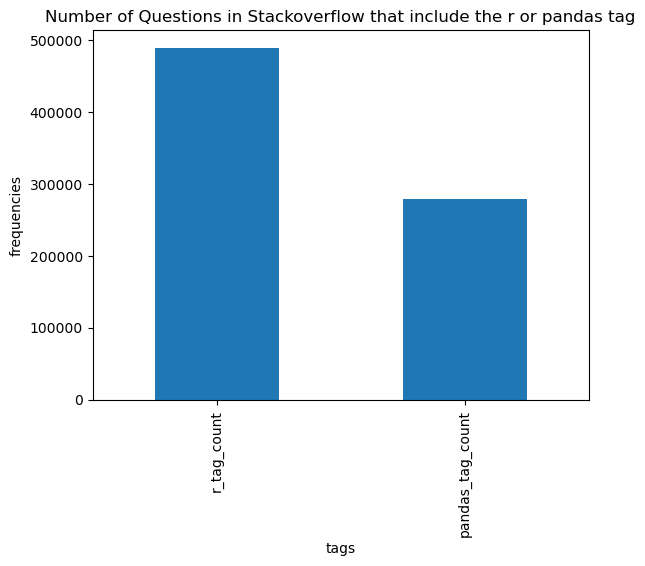

In [56]:
site_df.loc['stackoverflow'].plot.bar()
plt.xlabel('tags')
plt.ylabel('frequencies')
plt.title('Number of Questions in Stackoverflow that include the r or pandas tag')
plt.show()

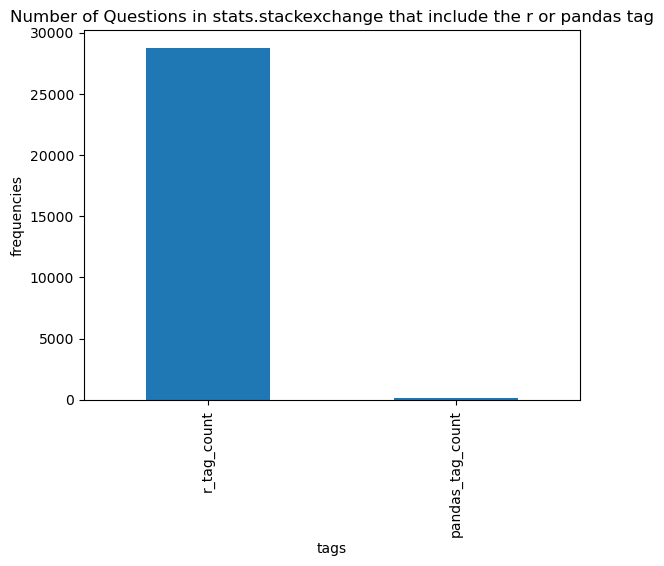

In [57]:
site_df.loc['stats.stackexchange'].plot.bar()
plt.xlabel('tags')
plt.ylabel('frequencies')
plt.title('Number of Questions in stats.stackexchange that include the r or pandas tag')
plt.show()

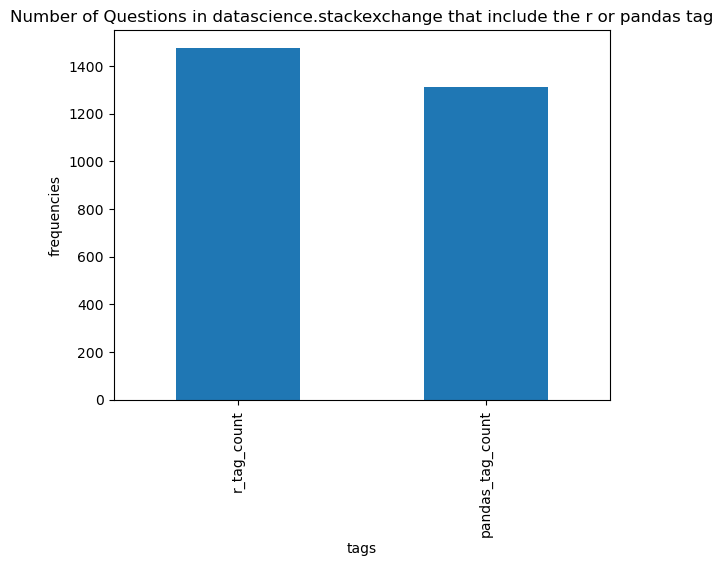

In [58]:
site_df.loc['datascience.stackexchange'].plot.bar()
plt.xlabel('tags')
plt.ylabel('frequencies')
plt.title('Number of Questions in datascience.stackexchange that include the r or pandas tag')
plt.show()

/Users/willbyrne/opt/anaconda3/envs/INST447/lib/python3.10/sre_parse.py:530: RuntimeWarning: coroutine 'total_count' was never awaited
  subpatternappend((LITERAL, _ord(this)))


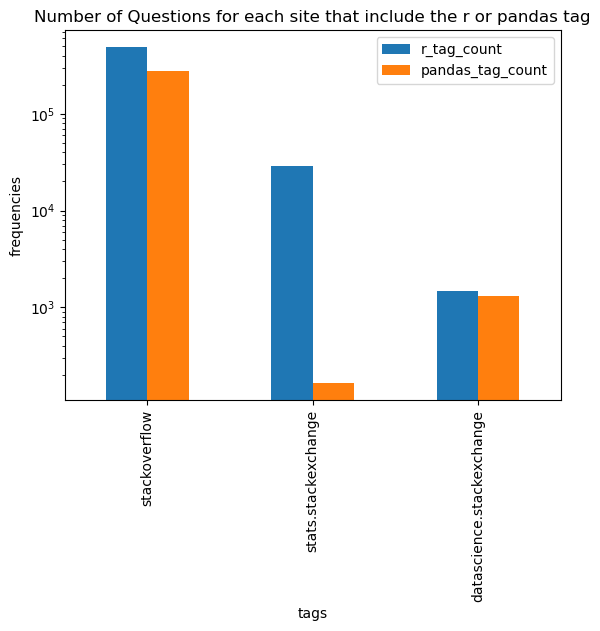

In [59]:
#log scale coming in clutch
site_df.plot(kind='bar', logy=True)
plt.xlabel('tags')
plt.ylabel('frequencies')
plt.title('Number of Questions for each site that include the r or pandas tag')
plt.show()

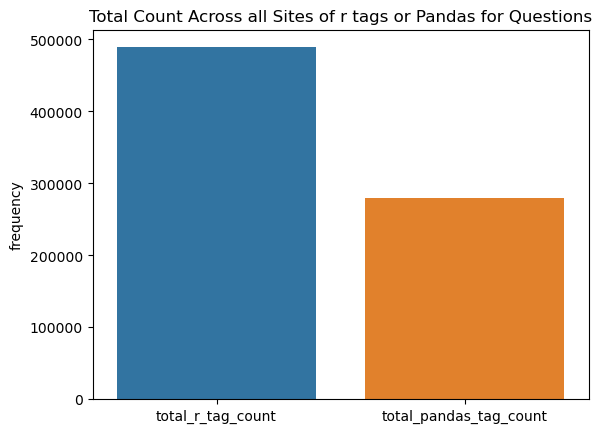

In [60]:
#final vis
sb.barplot(x=['total_r_tag_count', 'total_pandas_tag_count'], y = [site_df['r_tag_count'].max(), site_df['pandas_tag_count'].max()])
plt.ylabel('frequency')
plt.title('Total Count Across all Sites of r tags or Pandas for Questions')
plt.show()

# Answers

R seems to be more popular than pandas across all three wesbites. 
In both stackoverflow and datascience.stachexchange, the count is very close, but r wins by a hair. 
In stats.stackexchange, r wins by a landslide. 

### takeaway
Popularity of R seems to be larger than the popularity of Python. This differnece in popularity is likely to lead to more features added to R, and more requests for R experience in the job market.

### limitations
These are just the questions that are up now. What would be far more interesting to see is the change in the number of questions over maybe the last 10 years? That would be a much more accurate tell of the popularity of the two tools. There are other problems like maybe there are more questions because R is more confusing, or maybe it takes some time for the popularity of a tool in terms of questions asked on sites to swing to the current standard(maybe R was much more popular many years ago). 

### Workflow 

I just want to say first that this was a cool project. 

Step one was to mess witht the query in browser, and read the api. I'm looking for a few things. A way to query an individual website, a way to a way to get all questions on that website, a way to get all questions with specific tags, and a way to get more than 30 responses. questions?order=desc&sort=activity&tagged={tag}&site={site}&filter=total. boom. The filter thing at the end denotes enabling the "total" filter, which is used to count the number of responses if the response normally is massive(like our case). BTW, I spent like 30 minutes trying to find that alone. 

step two was to find a way to get the data for each tag/website combo. I did this with lists and forloops. slapped the list in a dictionary, then  made that a pandas dataframe. 

step 3 was to clean data if nessesary, however all I need is the count of the query. enableing the total flag gives me the count, so no cleaning is nessesary. 

step 4 was visualization. This was pretty easy. I made a barplot for each site, a stacked barplot showing them all compared to eachother, and a barplot comparing the sum of both. 

### Citation 
All data was gathered via the api for stack exhange @ https://api.stackexchange.com
data gathered from 3 cites, stackoverflow, stats.stackexchange, datascience.stackexchange
No individuals data was used, only rowcounts reported in data

### Challenges
Upon some basic googling, python seems to be well beyond the popularity of R when it comes to data science. 
A better way to do this would be to break down these questions into number of questions answered in a given year, then graph that over time. There could be very old questions, that were answred many years ago, that still show up in my query. 